## Introduction.

Welcome to this brief introduction to the Jupyter (formerly IPython) notebook. Jupyter is an interactive environment for a number of programming languages, including Python.  The notebook is one of several possible ways to interact with Python; it has many nice features, and so it is where we will focus our attention.  This document was developed for use in upper level physics classes at Marietta College. It is designed to help students with no prior programming experience be able to use Python to solve the kinds of problems we will encounter in class. It does not come close to exploring everything you can do with either the Jupyter notebook or the Python programming language.  If you want more information about either of those things, I would direct you toward the official documentation for the [Jupyter Project](http://jupyter-notebook.readthedocs.org) or [Python](http://python.readthedocs.org). As of this writing (January 2016) Python 3 is mature, stable, and well supported. There are some libraries that still don't support it, but it is what we will use.

Our use of IPython will fall into four broad categories:

1. Calculation
2. Plotting
3. Solving ODEs
4. Symbol manipulation

Of these, the last is complicated enough that it will get its own treatment. The first three are described below.


## Calculation

We can do simple calculations in IPython by just typing the expression we want to evaluate in an *input cell* and pressing `Shift-Enter`.  Try it by evaluating the addition below:

In [1]:
1 + 10

11

Most arithmetic operators work as you would expect. The order of operations is sensible, but you can always put in explicit parentheses to make sure things happen in the order you want.  There is one likely exception:

* You may have the urge to use the caret key "^" for exponentiation. This will not work. Use a double asterix "**" instead.

In [2]:
2^3

1

In [3]:
2**3

8

The caret `^` is a bitwise exclusive or operator. If that doesn't make any sense to you, you don't need to worry about it (other than to know it's not exponentiation). If you want to know more, though, you can use IPython's built in help.

In [4]:
help('^')

Operator precedence
*******************

The following table summarizes the operator precedence in Python, from
lowest precedence (least binding) to highest precedence (most
binding).  Operators in the same box have the same precedence.  Unless
the syntax is explicitly given, operators are binary.  Operators in
the same box group left to right (except for exponentiation, which
groups from right to left).

Note that comparisons, membership tests, and identity tests, all have
the same precedence and have a left-to-right chaining feature as
described in the *Comparisons* section.

+-------------------------------------------------+---------------------------------------+
| Operator                                        | Description                           |
+=================================================+=======================================+
| "lambda"                                        | Lambda expression                     |
+----------------------------------------------

Python 2.x performed integer division by default, which works more as a computer scientist might expect than as a physicist would expect. That is no longer the default in Python 3. Integer division is still around, however, so you can use it if you need to. Just use the `//` operator instead of standard division `/`.

In [5]:
2/3

0.6666666666666666

In [6]:
2//3

0

More sophisticated functions (like those you'd find on a scientific calculator) are not a part of the core python language, and so we get an error if we try to use them:

In [7]:
sin(0)

NameError: name 'sin' is not defined

Fortunately, nearly every function you will want to use (and many, many others that you will likely never find a use for) have been defined by folks who needed them at some point. These are available to you in *libraries*. The library we will use most frequently is called `numpy`. To make use of `numpy`, we have to import it:

In [8]:
import numpy as np

Now, I can call the functions that `numpy` defines by letting python know where to find them.

In [9]:
np.sin(1.1)

0.89120736006143542

In addition to functions, `numpy` defines some useful constants.

In [10]:
np.e

2.718281828459045

In [11]:
np.sin(np.pi/2)

1.0

One way to find out what a given library (or module, in python terms) contains is to look at its directory. In this case, `numpy` is a huge module, with lots and lots of component parts. Its directory will have some things you recognize as mathematical functions, and others that you don't (and don't need to) understand.

Additionally, since `numpy` is so big, executing the following cell will produce a lot of output. The notebook has a couple of features that make this more manageable. If you click once in the left margin of the output portion of the cell, the output section will become scrollable. If you click a second time it will be hidden entirely.  Try it out!

In [12]:
dir(np)

['ALLOW_THREADS',
 'BUFSIZE',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'MachAr',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'PackageLoader',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'Tester',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'VisibleDeprecationWarning',
 'WRAP',
 '_NoValue',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__doc__',
 '__file__',
 '__git_revision__',
 '__loader__',
 '__mkl_version__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_globals',
 '_import_tools',
 '_mat',
 'ab

Working with single numbers is okay, but there's no reason you can't do that with a hand calculator. One way to add some functionality is to work with lists of numbers instead of individuals. Here I'll compute the tangent of a few numbers at once:

In [13]:
np.tan([0, 0.1, 0.2, 0.3, 0.4, 0.5])

array([ 0.        ,  0.10033467,  0.20271004,  0.30933625,  0.42279322,
        0.54630249])

As an aside, notice here that the small angle approximation $\tan\theta \approx \theta$ gives almost 10% error when $\theta$ is 0.5.

Typing out lists of numbers is tedious. Fortunately, we can make it easier:

In [14]:
np.linspace(start=0, stop=np.pi, num=50)

array([ 0.        ,  0.06411414,  0.12822827,  0.19234241,  0.25645654,
        0.32057068,  0.38468481,  0.44879895,  0.51291309,  0.57702722,
        0.64114136,  0.70525549,  0.76936963,  0.83348377,  0.8975979 ,
        0.96171204,  1.02582617,  1.08994031,  1.15405444,  1.21816858,
        1.28228272,  1.34639685,  1.41051099,  1.47462512,  1.53873926,
        1.60285339,  1.66696753,  1.73108167,  1.7951958 ,  1.85930994,
        1.92342407,  1.98753821,  2.05165235,  2.11576648,  2.17988062,
        2.24399475,  2.30810889,  2.37222302,  2.43633716,  2.5004513 ,
        2.56456543,  2.62867957,  2.6927937 ,  2.75690784,  2.82102197,
        2.88513611,  2.94925025,  3.01336438,  3.07747852,  3.14159265])

The `linspace` function creates an array of `num` linearly spaced points between the `start` and `stop` parameters, inclusive.  Now, if I want to use this sequence of numbers, I have to give it a name.  Here I'm using the *assignment operator* `=`.  It's important to note that I'm not testing or asserting equality here; rather I'm assigning the name on the left hand side of the `=` to the value on the right hand side. Also notice that there is no output. Assignment is silent.

In [15]:
x = np.linspace(start=0, stop=np.pi, num=50)

On the other hand, I can recover the value by using its name.

In [16]:
x

array([ 0.        ,  0.06411414,  0.12822827,  0.19234241,  0.25645654,
        0.32057068,  0.38468481,  0.44879895,  0.51291309,  0.57702722,
        0.64114136,  0.70525549,  0.76936963,  0.83348377,  0.8975979 ,
        0.96171204,  1.02582617,  1.08994031,  1.15405444,  1.21816858,
        1.28228272,  1.34639685,  1.41051099,  1.47462512,  1.53873926,
        1.60285339,  1.66696753,  1.73108167,  1.7951958 ,  1.85930994,
        1.92342407,  1.98753821,  2.05165235,  2.11576648,  2.17988062,
        2.24399475,  2.30810889,  2.37222302,  2.43633716,  2.5004513 ,
        2.56456543,  2.62867957,  2.6927937 ,  2.75690784,  2.82102197,
        2.88513611,  2.94925025,  3.01336438,  3.07747852,  3.14159265])

As I did before, I can operate on this array of values. Now, however, I can just call it by name.

In [17]:
np.sin(x)

array([  0.00000000e+00,   6.40702200e-02,   1.27877162e-01,
         1.91158629e-01,   2.53654584e-01,   3.15108218e-01,
         3.75267005e-01,   4.33883739e-01,   4.90717552e-01,
         5.45534901e-01,   5.98110530e-01,   6.48228395e-01,
         6.95682551e-01,   7.40277997e-01,   7.81831482e-01,
         8.20172255e-01,   8.55142763e-01,   8.86599306e-01,
         9.14412623e-01,   9.38468422e-01,   9.58667853e-01,
         9.74927912e-01,   9.87181783e-01,   9.95379113e-01,
         9.99486216e-01,   9.99486216e-01,   9.95379113e-01,
         9.87181783e-01,   9.74927912e-01,   9.58667853e-01,
         9.38468422e-01,   9.14412623e-01,   8.86599306e-01,
         8.55142763e-01,   8.20172255e-01,   7.81831482e-01,
         7.40277997e-01,   6.95682551e-01,   6.48228395e-01,
         5.98110530e-01,   5.45534901e-01,   4.90717552e-01,
         4.33883739e-01,   3.75267005e-01,   3.15108218e-01,
         2.53654584e-01,   1.91158629e-01,   1.27877162e-01,
         6.40702200e-02,

## Plotting 

We've gotten to the point where plots would be useful. Like mathematical functions, plotting is not part of the core python language. There are a number of plotting libraries out there, but the one we will use is called `matplotlib`.  The IPython notebook is `matplotlib` aware in ways that are sort of deep and magical, but we don't need to go into the details. To use `matplotlib`, we need to import it, and we need to tell the notebook to display plots inline. Actually, we will import only one of `matplotlib`'s three interfaces, called `pyplot`.

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

The bad news at this point is that `matplotlib` is huge, and mastering it will take quite a bit of work. You should
be able to generate fairly simple plots without too much difficulty, though.

Let's start with something really simple, like the `sin` function we used above. When we imported the `pyplot` interface to `matplotlib`, we gave it the name `plt`, so our plotting functions will be found there. Most straitforward is the plot command.

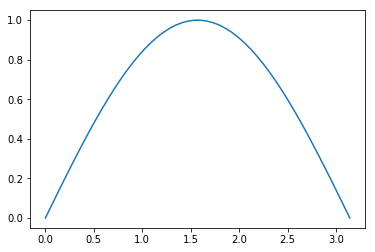

In [19]:
plt.plot(x, np.sin(x))

We passed in a set of x values and a corresponding set of y values. By default, the points are joined in a smooth line.  If we want to put more than one line in a figure, we just issue multiple plot commands.

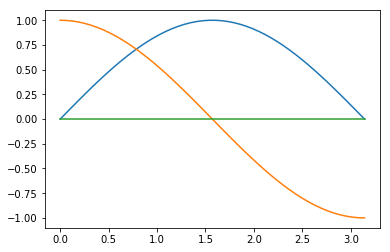

In [20]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.plot(x, np.zeros_like(x))

This is fine, but it's not very readable. We don't have any labels on the axes or lines, and there isn't a title. Let's fix that.

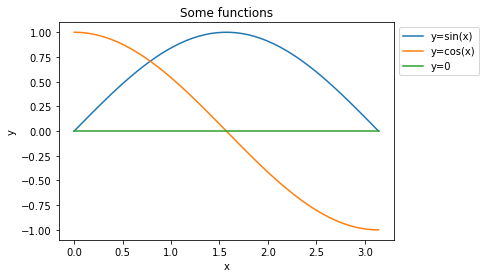

In [21]:
plt.plot(x, np.sin(x), label="y=sin(x)")
plt.plot(x, np.cos(x), label="y=cos(x)")
plt.plot(x, np.zeros_like(x), label="y=0")

plt.title("Some functions")
plt.xlabel("x")
plt.ylabel("y")
legend = plt.legend(loc="upper left")
legend.set_bbox_to_anchor((1.0, 1.0))

Note that input cells can consist of multiple lines.

The plot function has a lot of options (more than I can go into here). If you want to browse, or forget what you're trying to do, you can use IPython's tab completion to help you.  In the input cell below, type `plt.plot(`  (note the open parenthesis!) and wait for a few seconds. A bubble will appear with some help information. If you want more help, hit `Shift-Tab` once. Hitting `Shift-Tab` again will make the help persistent (it won't disappear when you start typing), and hitting it a third time will put the help in a scrollable frame at the bottom of your browser window.  Try it out!

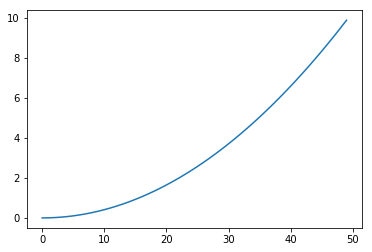

In [24]:
plt.plot(x**2)

Note that these plots look much, much better than similar ones you could make in Excel. Also note that you have lot's more control over both the data and how it's presented. If you ever try to turn in a plot from Excel in one of my classes, or use one in a presentation, I will beat you.

For an idea of the kinds of things you can do with `matplotlib`, have a look at [their gallery](http://matplotlib.sourceforge.net/gallery.html  "The Matplotlib gallery").

## Solving ODEs

We can solve ODEs with the `odeint` function, found in the excellent `scipy` package. I'm going to import it in a slightly different way here so that I can just refer to it as `odeint` instead of needing to call it `scipy.integrate.odeint` all of the time, which would get tedious.

In [25]:
from scipy.integrate import odeint

Let's start with a really simple ODE. We'll borrow the one from problem 1.25 in Taylor's *Classical Mechanics*, namely, $$ {dy\over dx} = -3y. $$

To do this, we must first define a function which, when called, returns the value of the derivative of $y(x)$ at a point $x$. Since this could, in general, depend on both $x$ and $y$, we need to pass in both as arguments.

The words between triple quotation marks are caled a *documentation string*, and are generally good programming practice. They let others (and you!) know what you were thinking when you wrote the code.

In [26]:
def func(y, x):
    """The function from Taylor problem 1.25

    This is so we can solve the differential equation $${dy \over dx} = -3y $$
    """
    return -3 * y

Before I can solve, I have to set up a range of values for my independent variable. I'll do that with the `linspace` function we've seen previously.

In [29]:
x = np.linspace(0, 10, 500)

The other thing I have to do when solving an ODE on a computer is provide initial conditions. In this case, I'll say that $y(0)= 10.0.$

In [30]:
y0 = 10.0

Then I solve using the `odeint` function.  I pass in the function I defined to give the right hand side of the ODE, along with the initial conditions and the independent variable range I just set up. I store the results in a variable called (appropriately) `y`.  I want to plot my results, and I want to compare with an analytic solution, which I think ought to be $y=e^{-3x}$.

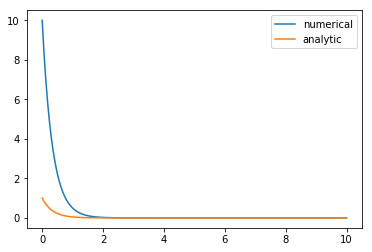

In [31]:
y = odeint(func, y0, x)
plt.plot(x,y, label='numerical')
plt.plot(x, np.exp(-3*x), label='analytic')
plt.legend()

Oops!  I forgot that my analytic solution has to match the initial conditions I provided, as well. In this case, that amounts to multiplying by $y(0)$, since $e^{-3\cdot0} = 1$

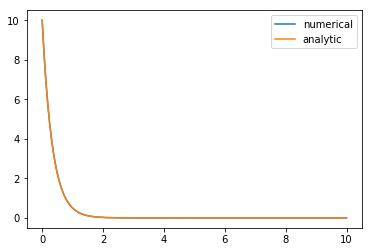

In [32]:
x = np.linspace(0, 10, 500)
y0 = 10.0
y = odeint(func, y0, x)
plt.plot(x,y, label='numerical')
plt.plot(x, y0*np.exp(-3*x), label='analytic')
plt.legend()

Now they look good. Just for kicks, let's plot this with a log scale on the y axis. Exponential decay should give us a straight line.

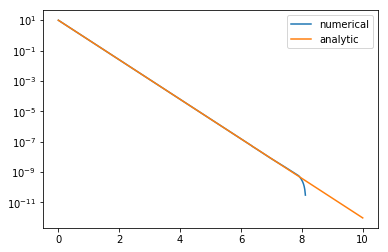

In [33]:
plt.semilogy(x,y, label='numerical')
plt.semilogy(x, y0*np.exp(-3*x), label='analytic')
plt.legend()

We notice that something funny happens around $x=8$. Namely, the value of our numerical solution falls below the roundoff threshold and becomes zero (which makes it disappear on a log plot). The difference is small enough that we couldn't see it on the normal plot, but it's obvious when we shift to a log scale.  This underscores the fact that you can't just blindly trust numerical solutions! In this case, if we wanted to keep integrating out past $x=8$, we could employ some tricks to be able to do so, but that's beyond the scope of this brief introduction.

#### Something slightly more interesting

That ODE was boring. Let's spice it up a bit.  We can put anything we want in the function we define as a derivative. This particular one gives us oscillations like a simple harmonic oscillator.

In [34]:
def shofunc(y, x):
    """A simple harmonic oscillator.

    This is so we can solve the differential equation $${dy\over dx} = -3*cos(3*x) $$
    """
    return -3 * np.cos(3*x)

We'll go ahead and reuse the independent variable and initial conditions we set up for the previous problem, integrate and plot the output.  See if you can solve this ODE by hand (it's also very simple) and plot the analytic solution below with appropriate labels set.

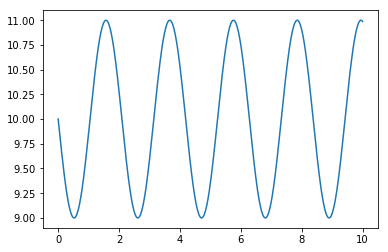

In [35]:
y = odeint(shofunc, y0, x)
plt.plot(x,y)

#### Systems of coupled equations

Let's say that instead of a single ODE, we have a system, like for example $${df\over d x} = -g, $$ 
$${dg \over dx} = f. $$

We can solve this with odeint, as well. We just treat $f$ and $g$ as the components of a vector. Then when we define our derivative function, it has to return a vector that has the derivative of $f$ in the first component, and the derivative of $g$ in the second component.

Note that in python, we start counting from 0, so that the first component of our vector `y` is actually `y[0]`.

In [36]:
def func_system(y, x):
    """Derivative function for a two component system of ODEs"""
    
    dfdx = -y[1]
    dgdx = y[0]
    return (dfdx, dgdx)

Our independent variable hasn't changed, but now we need to provide a vector of initial conditions. I can set $f(0) = 1.0$ and $g(0) = 0.0$ and then solve

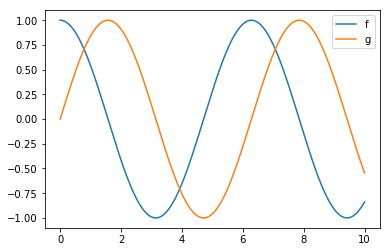

In [37]:
x = np.linspace(0, 10, 500)
y0 = (1.0, 0.0)
y = odeint(func_system, y0, x)
plt.plot(x,y[:,0], label="f")
plt.plot(x,y[:,1], label="g")
plt.legend()

#### Higher order equations as systems of coupled equations

We deal with second and higher order ODEs by representing them as systems of first order ODEs. For example, Newton's Second Law in one dimension, $$F = m\ddot{x}$$ can be represented as the pair of equations $$\dot{x} = v$$ and $$\dot{v} = {F\over m}.$$ 

This looks a little bit like it either won't buy us anything or it's base trickery. What it actually does is allow us to make a vector $$ y = \left(\begin{array}{c} x \\ v  \end{array}\right) $$ and solve the ODE for that just exactly as we did for the unrelated functions in the previous section.

Imagine that we have a force of the form $$F = -x - v.$$ Then we could find a solution to Newton's second law for a particle of unit mass by defining the derivtive function

In [38]:
def func_nsl(y,t):
    """Derivative function for Newton's second law.

    A linearly damped oscillator."""
    
    xdot = y[1]
    vdot = -y[0] - y[1]
    return (xdot, vdot)

Now that we're talking about Newton's second law, and solving for position and velocity, it makes more sense to call our independent variable `t`.

Again, my initial conditions have to be a vector.

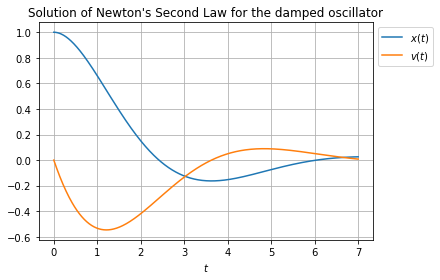

In [39]:
t = np.linspace(0, 7, 500)
y0 = (1.0, 0.0)
y = odeint(func_nsl, y0, t)
plt.plot(t,y[:,0], label=r"$x(t)$")
plt.plot(t,y[:,1], label=r"$v(t)$")
plt.xlabel("$t$")
plt.title(r"Solution of Newton's Second Law for the damped oscillator")
legend = plt.legend(loc="upper left")
legend.set_bbox_to_anchor((1.0, 1.0))
plt.grid()

You're going to get a lot of opportunities to do this sort of thing this semester.